<a href="https://colab.research.google.com/github/hejiang2/python-statistics/blob/master/Thinking_probabilistically.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.   Discrete variables


> Bernoulli trial






In [1]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
heads = random_numbers < 0.5
np.sum(heads)

1

In [2]:
n_all_heads = 0 # Initialize number of 4-heads trials
for _ in range(10000):
  heads = np.random.random(size=4) < 0.5
  n_heads = np.sum(heads)
  if n_heads == 4:
    n_all_heads += 1

n_all_heads / 10000

0.0619

In [0]:
# write a function to perform n Bernoulli trials
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function and record how many defaults we get. 

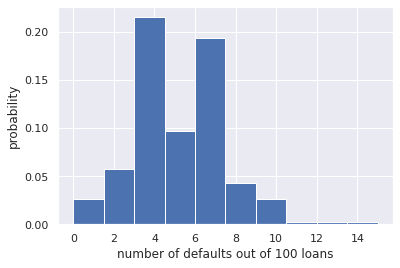

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, p = 0.05)

plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')
plt.show()

In [0]:
# write a function to compute the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

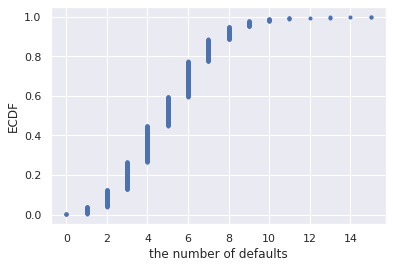

In [13]:
# plot the number of defaults as a CDF
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("the number of defaults")
plt.ylabel('ECDF')

# Show the plot
plt.show()

Binomial distribution



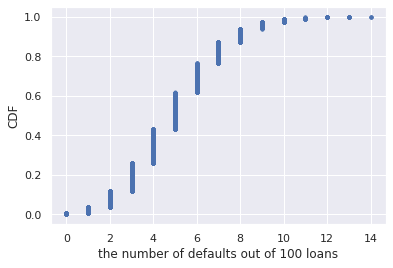

In [14]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p =0.05, size =10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker=".",linestyle="none")
plt.xlabel("the number of defaults out of 100 loans")
plt.ylabel("CDF")

# Show the plot
plt.show()

# 2.   Continuous variables

Normal distribution

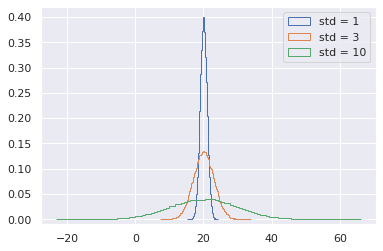

In [16]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

# Make histograms
plt.hist(samples_std1, density=True, histtype='step', bins=100)
plt.hist(samples_std3, density=True, histtype='step', bins=100)
plt.hist(samples_std10, density=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


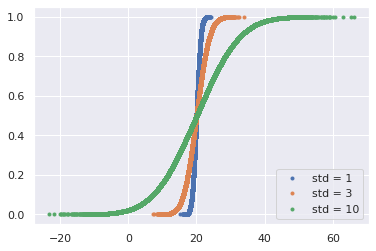

In [17]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker = '.', linestyle = "none")
plt.plot(x_std3, y_std3, marker = '.', linestyle = "none")
plt.plot(x_std10, y_std10, marker = '.', linestyle = "none")

# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

Poisson distribution and Exponential distribution


In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Both Binomial and Poisson, though Poisson is easier to model and compute.

Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [0]:
# write a function to compute the sum of the waiting times for the two events
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

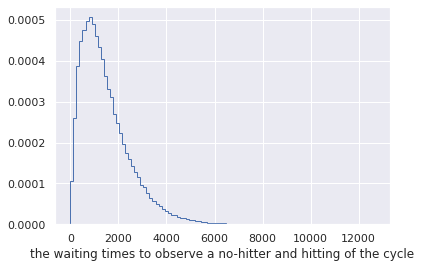

In [20]:
# the mean waiting time for a no-hitter is 764 games
# the mean waiting time for hitting the cycle is 715 games
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
plt.xlabel("the waiting times to observe a no-hitter and hitting of the cycle")

# Show the plot
plt.show()
